<a href="https://colab.research.google.com/github/Jerez-lab/ML-course/blob/main/4_lab/04_grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ЗАДАНИЕ 1

Реализуйте класс LinearRegressionSGD c обучением и и применением линейной регрессии, построенной с помощью стохастического градиентного спуска, с заданным интерфейсом.

Обратите внимание на следуюшие моменты:

* Схожий класс использовался в лекции
* Выбирайте 10 случайных сэмплов (равномерно) каждый раз.
* Используйте параметры по умолчанию (epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8)
* Выход из цикла осуществуется по сравнению 2-нормы разницы весов с epsilon, а функция потерь - MSE.

Визуализируйте траекторию градиентного спуска (как в лекции)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import time

from sklearn.base import BaseEstimator

np.random.seed(0)

In [ ]:
class LinearRegression(BaseEstimator):
    def __init__(self, epsilon=1e-4, max_steps=1000, w0=None, alpha=1e-2):
        
        self.epsilon = epsilon # разница для нормы изменения весов 
        self.max_steps = max_steps # максимальное количество шагов
        self.w0 = w0 # начальные веса
        self.alpha = alpha # шаг обучения
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.zeros(d)

        self.w = self.w0

        for step in range(self.max_steps):
            self.w_history.append(self.w)

            w_new = self.w - self.alpha * self.calc_gradient(X, y)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        return self
    
    def predict(self, X):
        
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)

In [ ]:
class LinearRegressionSGD(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8, batch_size=10):
        """
        epsilon: разница для нормы изменения весов 
        max_steps: максимальное количество шагов в градиентном спуске
        w0: np.array (d,) - начальные веса
        alpha: шаг обучения
        """
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []
        self.batch_size = batch_size
    
    def fit(self, X, y):
        
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.zeros(d)

        self.w = self.w0

        for step in range(self.max_steps):
            self.w_history.append(self.w)
            X_batch, y_batch = self.__batch_generator(X, y, batch_size=self.batch_size)
            w_new = self.w - self.alpha * self.calc_gradient(X_batch, y_batch)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        ## На каждом шаге градиентного спуска веса можно добавлять в w_history (для последующей отрисовки)
        ## Для выполнения шага выберите 10 случайных(равномерно) сэмплов
        return self
    
    def predict(self, X):
        
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))
        
        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)
    
    def __batch_generator(self, X, y, batch_size=10):
        
        t = 1000 * time.time()
        np.random.seed(int(t) % 2**32)
        l, d = X.shape
        idx = np.random.choice(l, batch_size, replace=False)
        
        return X[idx], y[idx]

In [ ]:
def plot_gd(X, y, w_history):
    # compute level set
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    
    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [ ]:
def plot_sgd(X, y, w_history):
    # compute level set    
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))
 
    plt.figure(figsize=(13, 9))
    plt.title('SGD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))
    
    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    
    # visualize trajectory
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [ ]:
n_features = 2
n_objects = 300
num_steps = 100


np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))

X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

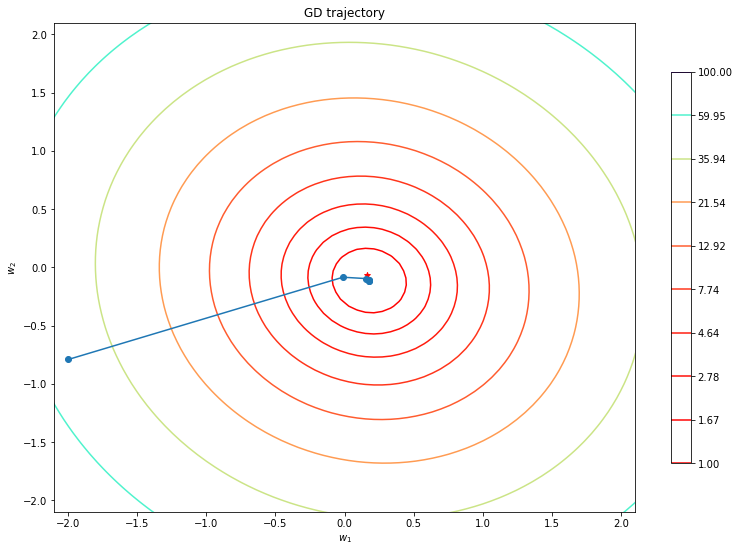

In [ ]:
lr = LinearRegression(w0=w_0, alpha=0.05)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

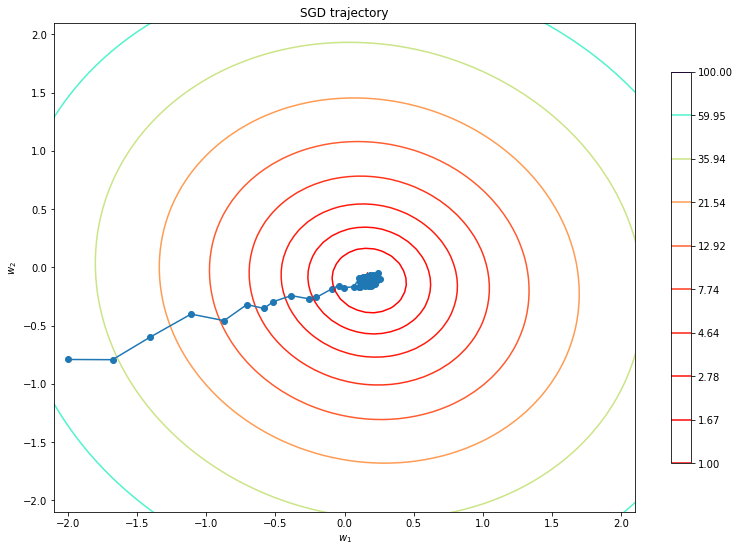

In [ ]:
lr = LinearRegressionSGD(w0=w_0, alpha=1e-2)
lr.fit(X, y)

plot_sgd(X, y, lr.w_history)

## ЗАДАНИЕ 2

Предсказать стоимость домов

Сравнить алгоритмы линейной регресии с полным градиентным спуском и стохастическим градиентным спуском по MSE на тестовой выборке и времени работы алгоритма

In [ ]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
def test_gd():
    lr = LinearRegression(alpha=0.01)
    lr.fit(X_train, y_train)
    return lr

lr = test_gd()

In [ ]:
def test_sgd():
    lr_sgd = LinearRegressionSGD(alpha=0.01)
    lr_sgd.fit(X_train, y_train)
    return lr_sgd

lr_sgd = test_sgd()

In [ ]:
Alpha = lr.alpha
MSE = mean_squared_error(y_test, lr.predict(X_test))
Time = timeit.timeit('test_gd()', setup="from __main__ import test_gd", number=3)
print(f"For GD: Alpha = {Alpha}, time = {Time}, MSE = {MSE}")

For GD: Alpha = 0.01, time = 36.38715870000033, MSE = 598.2501318447516


In [ ]:
Alpha = lr_sgd.alpha
MSE = mean_squared_error(y_test, lr_sgd.predict(X_test))
Time = timeit.timeit('test_gd()', setup="from __main__ import test_gd", number=3)
print(f"For SGD: Alpha = {Alpha}, time = {Time}, MSE = {MSE}")

For SGD: Alpha = 0.01, time = 32.185653999999886, MSE = 619.6761243154133
